### prepare

In [34]:

# lib
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# for plot
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3

%matplotlib inline


In [4]:

sp.stats.binom.pmf(1,2,0.5)


0.500

In [16]:

sp.stats.binom.rvs(n=10, p=0.5,  size=5)


array([5, 6, 4, 4, 8])

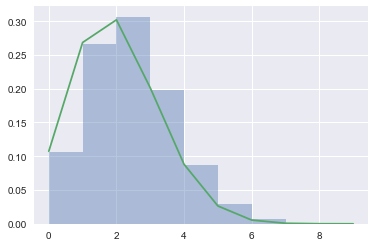

In [25]:

binominal = sp.stats.binom(n=10, p=0.2)

rvs_binominal = binominal.rvs(size=10000)

m = np.arange(0, 10, 1)

pmf_binominal = binominal.pmf(k=m)

sns.distplot(rvs_binominal, bins=m, kde=False, norm_hist=True)

plt.plot(m, pmf_binominal)

In [26]:

sp.stats.poisson.pmf(2, 5)


0.084

In [29]:

sp.stats.poisson.rvs(2, size=5)


array([5, 1, 3, 2, 1])

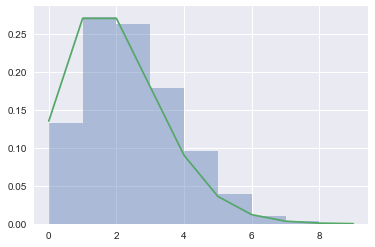

In [33]:

poisson = sp.stats.poisson(mu = 2)

rvs_poisson = poisson.rvs(size=10000)

pmf_poisson = poisson.pmf(k=m)

sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True)

plt.plot(m, pmf_poisson)

In [39]:

test_result = pd.read_csv("6-3-1-logistic-regression.csv")

print(test_result.head())


   hours  result
0      0       0
1      0       0
2      0       0
3      0       0
4      0       0


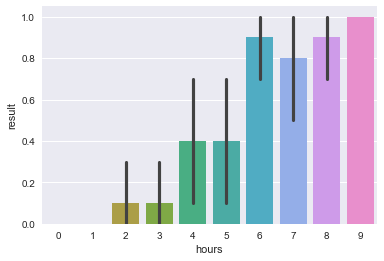

In [37]:

sns.barplot(x="hours", y="result", data=test_result)


In [40]:

print(test_result.groupby("hours").mean())


       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


### 学習

In [41]:

mod_glm = smf.glm(formula="result ~ hours", data=test_result, family=sm.families.Binomial()).fit()


In [42]:

mod_glm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 27 May 2018   Deviance:                       68.028
Time:                        10:18:38   Pearson chi2:                     84.9
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### to be compared

In [44]:

mod_glm_null = smf.glm(
    "result ~ 1", data=test_result,
    family=sm.families.Binomial()
).fit()

print(mod_glm_null.aic.round(3))
print(mod_glm.aic.round(3))

139.989
72.028


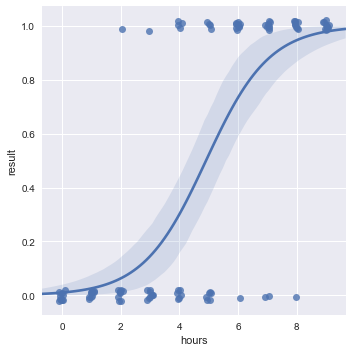

In [47]:

sns.lmplot(x="hours", y="result", data=test_result, logistic=True, x_jitter=0.1, y_jitter=0.02)


### to predict


In [48]:

exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})

pred = mod_glm.predict(exp_val)

pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64


### odds

In [55]:

exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

odds = sp.log(odds_2 / odds_1)
print(odds)

print(mod_glm.params["hours"])

sp.exp(mod_glm.params["hours"])

[0.929]
0.9288901756284957


2.532

In [57]:

mod_glm.resid_pearson.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
dtype: float64

In [56]:

mod_glm.pearson_chi2

84.911

In [58]:

sp.sum(mod_glm.resid_deviance ** 2)

68.028

In [59]:

beer = pd.read_csv("6-5-1-poisson-regression.csv")
print(beer.head())

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0
3            4         14.1
4            2          9.4


In [62]:

mod_pois = smf.glm("beer_number ~ temperature", beer, family=sm.families.Poisson()).fit()

mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sun, 27 May 2018   Deviance:                       5.1373
Time:                        12:39:32   Pearson chi2:                     5.40
No. Iterations:                     4                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [64]:

mod_pois_null = smf.glm("beer_number ~ 1", beer, family=sm.families.Poisson()).fit()


In [65]:

print(mod_pois_null.aic.round(3))
print(mod_pois.aic.round(3))

223.363
119.343


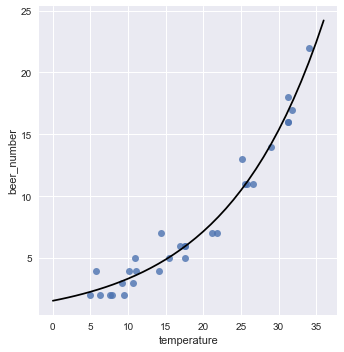

In [67]:

x_plot = np.arange(0, 37)

pred = mod_pois.predict(
    pd.DataFrame({"temperature": x_plot})
)

sns.lmplot(y="beer_number", x="temperature", data=beer, fit_reg=False)

plt.plot(x_plot, pred, color="black")

In [68]:

sp.exp(mod_pois.params["temperature"])

1.079